<a href="https://colab.research.google.com/github/moncykurien/FakeNewsProject/blob/main/Copy_of_fake_new_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. 

In this project, we have a dataset in the data folder. The folder contains a CSV files train_news.csv and we can use the train_news.csv data to build a model to predict whether a news is fake or not fake.


#Data Description

There are 6 columns in the dataset provided.

The description of each of the column is given below:

      “id”:  Unique id of each news article

      “headline”:  It is the title of the news.

      “news”:  It contains the full text of the news article

      “Unnamed:0”:  It is a serial number

      “written_by”:  It represents the author of the news article

      “label”:  It tells whether the news is fake (1) or not fake (0).


#Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/moncykurien/FakeNewsProject/main/data/train_news.csv')
dataset

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...,...
20795,20795,5671,NaN,NeverSurrender,"No, you'll be a dog licking of the vomit of yo...",1
20796,20796,14831,Albert Pike and the European Migrant Crisis,Rixon Stewart,"By Rixon Stewart on November 5, 2016 Rixon Ste...",1
20797,20797,18142,Dakota Access Caught Infiltrating Protests to ...,Eddy Lavine,posted by Eddie You know the Dakota Access Pip...,1
20798,20798,12139,How to Stretch the Summer Solstice - The New Y...,Alison S. Cohn,"It’s officially summer, and the Society Boutiq...",0


In [ ]:
print(f"There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in the dataset.")

There are 20800 rows and 6 columns in the dataset.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [ ]:
dataset.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

Looking at the records that are missing 'news' data

In [ ]:
dataset[dataset['news'].isnull()]

,Unnamed: 0,id,headline,written_by,news,label
556,556,9454,Il saoule tout le monde avec son analyse polit...,NaN,NaN,1
1642,1642,11486,"Pour booster les ventes, Dassault offre un por...",NaN,NaN,1
1765,1765,573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1968,1968,9446,Trop essoufflé après avoir cherché ses affaire...,NaN,NaN,1
2200,2200,3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1
3183,3183,13107,Les gardes-frontières se mettent en alerte pou...,NaN,NaN,1
3927,3927,4358,Ne supportant plus l’ambiance de la campagne é...,NaN,NaN,1
4333,4333,14499,Primaire – François Fillon se désiste au profi...,NaN,NaN,1
4746,4746,2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1
4747,4747,8649,Donald Trump s’excuse pour toutes les minorité...,NaN,NaN,1


In [ ]:
dataset[dataset['news'].isnull()].label.value_counts()

1    39
Name: label, dtype: int64

Observations:
1. None of the headlines are in English that are missing the 'news' data.
2. All these rows are also missing the 'written_by' data.
3. All the samples that are missing data in 'news' columns are labeled as fake news.

Lets these headlines and see what these are:

In [ ]:
for i in dataset[dataset['news'].isnull()].headline:
  print(i)
  print('*'*50)

Il saoule tout le monde avec son analyse politique depuis qu’il a lu « 1984 » >> Le Gorafi
**************************************************
Pour booster les ventes, Dassault offre un porte-clé Hello Kitty pour tout achat de Rafale >> Le Gorafi
**************************************************
Le top des recherches Google passe en top des recherches Google >> Le Gorafi
**************************************************
Trop essoufflé après avoir cherché ses affaires de sports dans toute la maison, il renonce à son jogging >> Le Gorafi
**************************************************
Les Américains ne sont plus qu’à quelques heures d’être enfin tranquilles pour quatre ans >> Le Gorafi
**************************************************
Les gardes-frontières se mettent en alerte pour repousser les premières vagues de migrants Américains >> Le Gorafi
**************************************************
Ne supportant plus l’ambiance de la campagne électorale, un Français chanceux décide d

In [ ]:
#for i in dataset[dataset['news'].isnull()].headline:
 # blob = TextBlob(i)
# print(blob.detect_language())
#  try:
#    print(i)
#    print(blob.translate(to='en'))
#  except:
#    continue
#  finally:
#    print('*'*50)

Observations:
1. All these headlines have 'Le Gorafi' in them at the end.
2. Le Gorafi is a site of news satire, created in May 2012 during the French presidential campaign in the style of The Onion, a satirical newspaper of fake information. Wiki. https://en.wikipedia.org/wiki/Le_Gorafi
3. Hence it makes sense that all these are labeled as fake news.
4. May be that is why it has no written by information and any news texts. There could be future data like these.

In [ ]:
#checking if there are more news data from Le Gorafi
count = 0
for i in dataset.headline:  
  try:
    if 'Le Gorafi' in i:
      count += 1
  except:
    continue
print(f'There are {count} headlines with Le Gorafi.')

There are 39 headlines with Le Gorafi.


Observations:
1. There are only a total of 39 Le Gorafi occurances in the whole dataset in 'Headline'.

Looking at the records with missing 'headline' data.

In [ ]:
dataset[dataset['headline'].isnull()]

,Unnamed: 0,id,headline,written_by,news,label
8,8,13559,NaN,steventexas,People have made up their minds on president.\...,1
14,14,14017,NaN,hubwolf,True. Hillary needs a distraction and what bet...,1
24,24,8643,NaN,OZbanislam,When I attempt to share your stuff on Facebook...,1
56,56,1835,NaN,Anteater,The Philippines are doing just fine since kick...,1
72,72,7209,NaN,Paul Reinhardt,Let's see - #1 liar denies knowledge of #2 lia...,1
...,...,...,...,...,...,...
20671,20671,1498,NaN,Man,do you need an advanced warning that Lawrence ...,1
20703,20703,19714,NaN,ELSEVAR,"Alas, Tyler, Hillary was/is an unapologetic bo...",1
20738,20738,9292,NaN,Daniel Pejchl,So he didn't question where he was sending ema...,1
20748,20748,7124,NaN,Anonymous,The second video (bottom one ) proves what Tru...,1


Checking if there are any Le Gorafi in the news field for these data points that are missing 'headline'.

In [ ]:
count = 0
for i in dataset[dataset['headline'].isnull()].news:  
  try:
    if 'Le Gorafi' in i:
      count += 1
  except:
    continue
print(f'There are {count} datapoints with Le Gorafi in the news field for headlines that are missing.')

There are 0 datapoints with Le Gorafi in the news field for headlines that are missing.


In [ ]:
print(f"{dataset[dataset['headline'].isnull()].shape[0]} rows are missing headlines.\n\nValue Counts:")
dataset[dataset['headline'].isnull()].label.value_counts()

558 rows are missing headlines.

Value Counts:


1    558
Name: label, dtype: int64

Observations:
1. There are 558 rows with missing headline data.
2. All of these records are labelled as fake news.

Looking at records with missing 'written_by' data

In [ ]:
print(f"{dataset[dataset['written_by'].isnull()].shape[0]} rows are missing 'written by' information.\n\nValue Counts:")
dataset[dataset['written_by'].isnull()].label.value_counts()

1957 rows are missing 'written by' information.

Value Counts:


1    1931
0      26
Name: label, dtype: int64

Observations:
1. There are 1957 records that are missing 'written by' information.
2. A large mejority of these records are labeled as fake news. That would be about 1931 rows.
3. About 26 records that are missing 'written by' are real news.

In [ ]:
#Looking at the real news that are missing 'written_by' informatin
dataset[(dataset['written_by'].isnull()) & (dataset['label']==0)]

,Unnamed: 0,id,headline,written_by,news,label
244,244,13993,Full Transcript and Video: Trump Picks Neil Go...,NaN,President Trump announced on Tuesday that Neil...,0
1894,1894,17993,"California Today: Airbnb, a Hometown Success (...",NaN,Good morning. This is the last day of our test...,0
1954,1954,15876,9 New Books We Recommend This Week - The New Y...,NaN,"I know, the number of big books out each fall ...",0
2583,2583,5911,Keep Your Family Close and Your Roomba Closer ...,NaN,How lovable can a robot be? A study of Roomba ...,0
2703,2703,14228,Transcript: President Obama on What Books Mean...,NaN,"Michiko Kakutani, the chief book critic for Th...",0
2798,2798,15893,Reaction to a Supreme Court Tie on Immigration...,NaN,The Supreme Court’s vote in a major immigrat...,0
2863,2863,7032,Reactions to the Supreme Court Ruling on Texas...,NaN,"In a major abortion ruling Monday, the Supreme...",0
3041,3041,12729,The Best and Worst of the Golden Globes - The ...,NaN,Here’s a look at the most memorable moments fr...,0
5272,5272,10204,Full Transcript and Video: Trump News Conferen...,NaN,President Trump on Thursday announced his new ...,0
5474,5474,3675,"2 TV Shows, 4 Books and 7 Viral Videos for You...",NaN,Summer’s almost over. Here’s a cultural diet f...,0


Observations:
1. Since most of the fake new labels are true for datapoints that has missing values, the model may think if there is a missing value, then its a fake news. hence I am dropping the missing values

In [ ]:
dataset.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
df = dataset.dropna()

In [ ]:
df.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [ ]:
print(f"By dropping the records with the missing fields, we are losing {dataset.shape[0]-df.shape[0]} rows")
print(f'\nAvailable datapoints for training is {df.shape[0]}')
print('\nValue Counts')
df.label.value_counts()

By dropping the records with the missing fields, we are losing 2515 rows

Available datapoints for training is 18285

Value Counts


0    10361
1     7924
Name: label, dtype: int64

Observations:
1. We still have enough data in both classes. The dataset is still balanced.
2. I will also try by filling the missing values with 'unknown' and experiment with the models.

In [ ]:
dataset.fillna('unknown',inplace=True)

In [ ]:
dataset.isnull().sum()

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64

Combining the headline, written_by and the news fields.

In [ ]:
df['combined_text'] = df[['headline','written_by','news']].apply(lambda x: '|'.join(x), axis=1)
df.head()

,Unnamed: 0,id,headline,written_by,news,label,combined_text
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins|Finian Cunningham...


In [ ]:
dataset['combined_text'] = dataset[['headline','written_by','news']].apply(lambda x: '|'.join(x), axis=1)
dataset.head()

,Unnamed: 0,id,headline,written_by,news,label,combined_text
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,Ethics Questions Dogged Agriculture Nominee as...
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,Cotton to House: ’Do Not Walk the Plank and Vo...
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,"Paul LePage, Besieged Maine Governor, Sends Co..."
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,A Digital 9/11 If Trump Wins|Finian Cunningham...


Preprocessing using NLP

In [ ]:
import string
from nltk.corpus import stopwords
import re
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(dataframe, feature, new_feature):
  punctuations = string.punctuation +'.|'  #adding the '|' symbol since that was added while combining the fields
  #adding some additional stop words which were encoundered during EDA.
  additional_words = ['u','ur','im','doin','ure','i','so','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','and','i','a','and','so','arnt','this','when','it','many','many','so','cant','yes','no','these', 'daww','umm','would','said', 'new', 'like', 'even','It ','could','de','get']
  stop_words = set(stopwords.words('english') + additional_words)

  def remove_stopwords_punct(x):
   cln = []
   words = word_tokenize(x)
   filtered_words = [word for word in words if word not in stop_words]
   filtered_words = [word for word in filtered_words if word not in punctuations]
   return ' '.join(filtered_words)

  def removePatterns(x): 
    cleaned_text  = re.sub("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b",' ',x)
    return (cleaned_text)

  #Converting all characters to lowercase
  dataframe[new_feature] = dataframe[feature].str.lower()

  #Replace any email addresses as "emailaddress"
  dataframe[new_feature] = dataframe[new_feature].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

  #Replace any web site addresses as "webaddress"
  dataframe[new_feature] = dataframe[new_feature].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$", 'webaddress')

  #Remove any html tags
  dataframe[new_feature] = dataframe[new_feature].str.replace(r"<.*?>", ' ')

  #Replace any currencies as 'currencyamount'
  dataframe[new_feature] = dataframe[new_feature].str.replace(r'£|\$|₹','currencyamount')

  #Replace any phone numbers as "phonenumber"
  dataframe[new_feature] = dataframe[new_feature].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

  #Replace any numbers as "numbr"
  dataframe[new_feature] = dataframe[new_feature].str.replace(r'\d+(\.\d+)?','numbr')

  #Removing punctuations and stopwords
  dataframe[new_feature] = dataframe[new_feature].apply(remove_stopwords_punct)
  
  #Removing any unneccessarily repeating characters
  dataframe[new_feature] = dataframe[new_feature].apply(removePatterns)

  #Replace any non alphabetic characters with a blank space
  dataframe[new_feature] = dataframe[new_feature].str.replace(r'[^\w\d\s]',' ')

  #Replace any extra statuses with a single blank space
  dataframe[new_feature] = dataframe[new_feature].str.replace(r'\s+',' ')

  dataframe[new_feature] = dataframe[new_feature].apply(lambda x: ' '.join( [w for w in x.split() if len(w)>1] ))

In [ ]:
clean_text(dataset, 'combined_text','cleaned_combined_text')
clean_text(df, 'combined_text','cleaned_combined_text')

#Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def wordlemmatize(x):
  lemma = WordNetLemmatizer()
  words = word_tokenize(x)
  lemma_words = ' '.join([lemma.lemmatize(word) for word in words])
  return lemma_words

dataset['lemma_cleaned_combined_text'] = dataset['cleaned_combined_text'].apply(lambda x: wordlemmatize(x))
df['lemma_cleaned_combined_text'] = df['cleaned_combined_text'].apply(lambda x: wordlemmatize(x))

#Data Visualization

##Target Variable count

###Class distribution of dataset with missing data

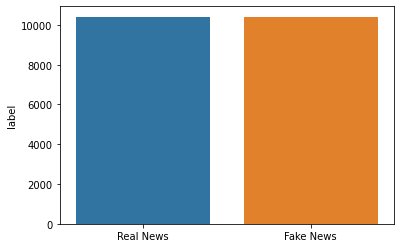

In [ ]:
g = sns.barplot(dataset.label.value_counts().index,dataset.label.value_counts())
g.set_xticklabels(['Real News', 'Fake News'])
plt.show()

###Class distribution of dataset without missing data

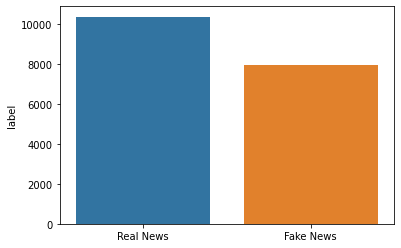

In [ ]:
g = sns.barplot(df.label.value_counts().index,df.label.value_counts())
g.set_xticklabels(['Real News', 'Fake News'])
plt.show()

###Plot top words

In [ ]:
from nltk import tokenize
import nltk

In [ ]:
def plot_top_words(df, col, top_n_words):
  token = tokenize.WhitespaceTokenizer()
  word_lake = ' '.join(text for text in df[col])
  word_counts = token.tokenize(word_lake)
  frequency = nltk.FreqDist(word_counts)
  df_freq = pd.DataFrame({'word' : list(frequency.keys()),
                          'frequency' : list(frequency.values())})
  df_freq = df_freq.nlargest(columns = 'frequency', n = top_n_words)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_freq, x='word', y='frequency')
  ax.set(ylabel='count')
  plt.xticks(rotation='vertical')
  plt.show()


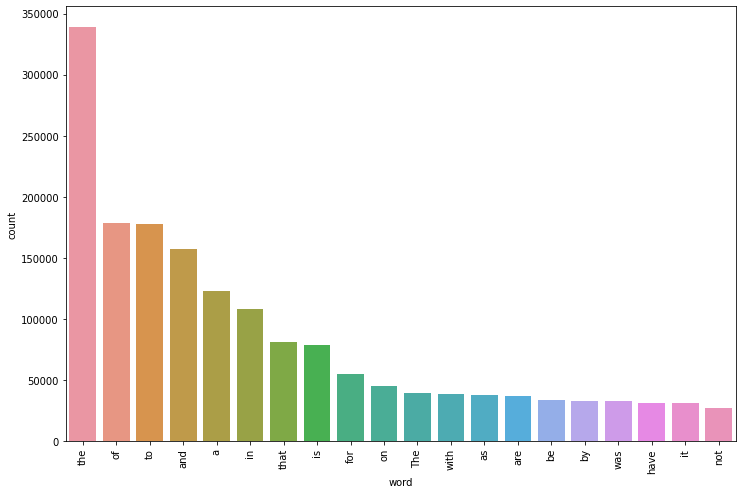

In [ ]:
plot_top_words(dataset[dataset['label']==1], 'combined_text', 20)

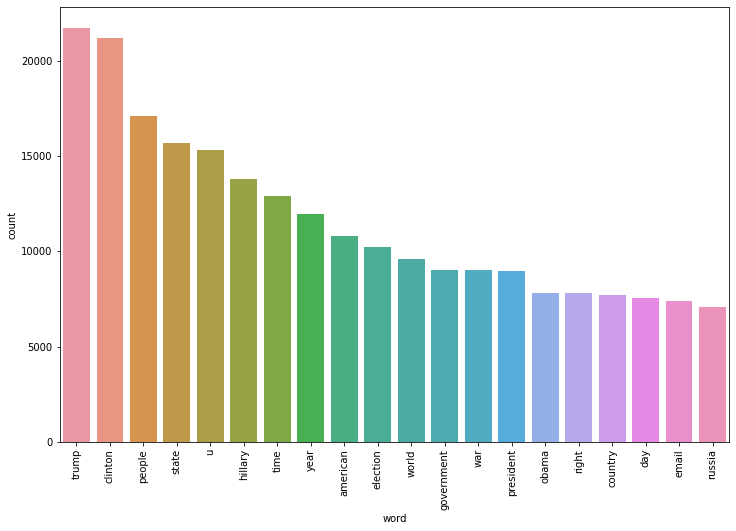

In [ ]:
plot_top_words(dataset[dataset['label']==1], 'lemma_cleaned_combined_text', 20)

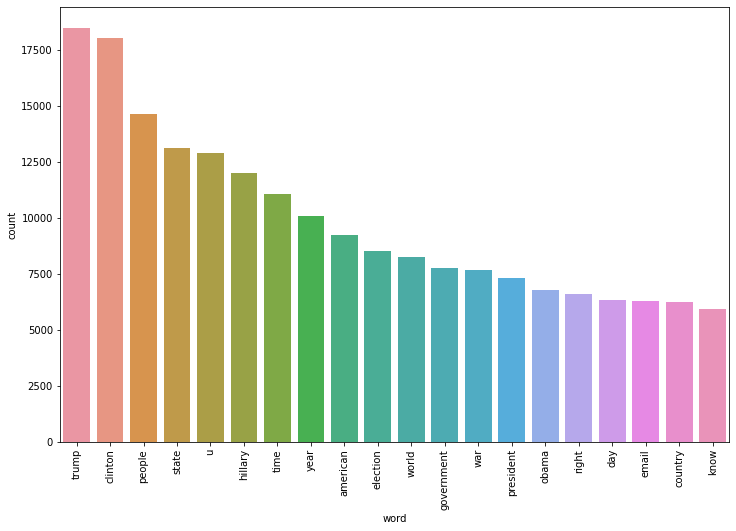

In [ ]:
plot_top_words(df[df['label']==1], 'lemma_cleaned_combined_text', 20)

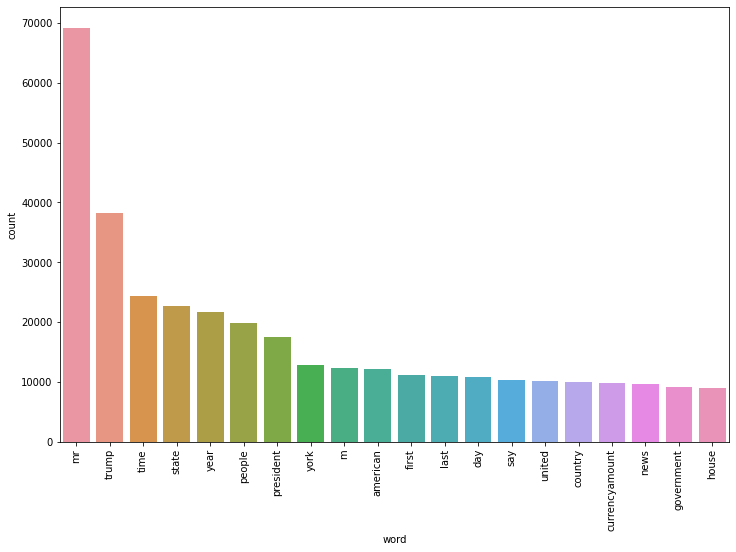

In [ ]:
plot_top_words(df[df['label']==0], 'lemma_cleaned_combined_text', 20)

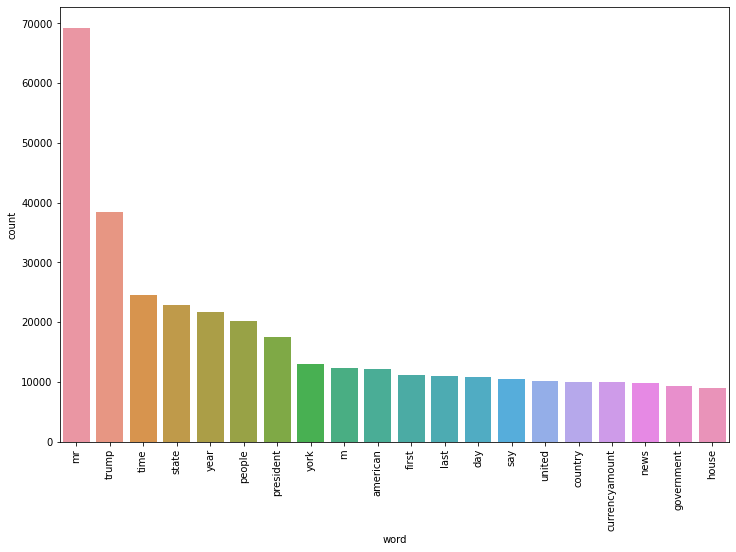

In [ ]:
plot_top_words(dataset[dataset['label']==0], 'lemma_cleaned_combined_text', 20)

##Word Cloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import string

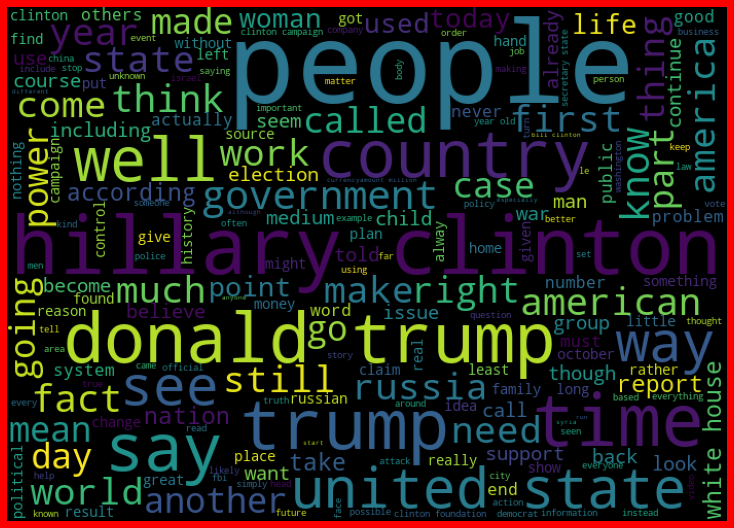

In [ ]:
fake = dataset[dataset['label']==1]['lemma_cleaned_combined_text']

fake_cloud = WordCloud(width=700,height=500,background_color='black').generate(' '.join(fake))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

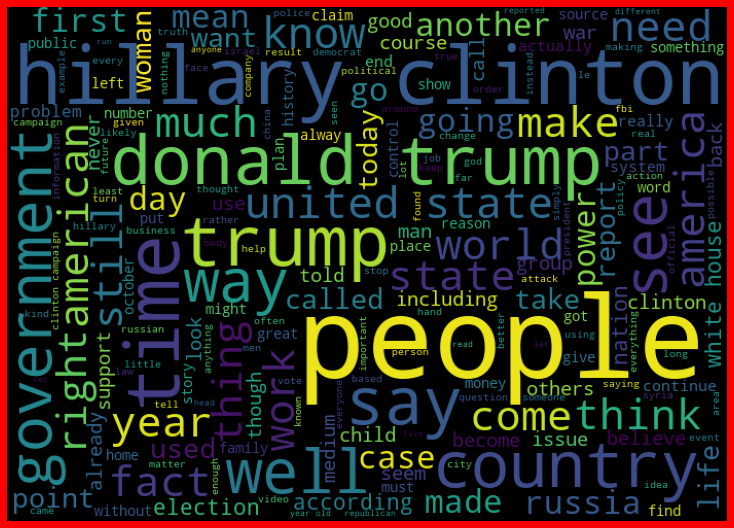

In [ ]:
fake = df[df['label']==1]['lemma_cleaned_combined_text']

fake_cloud = WordCloud(width=700,height=500,background_color='black').generate(' '.join(fake))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

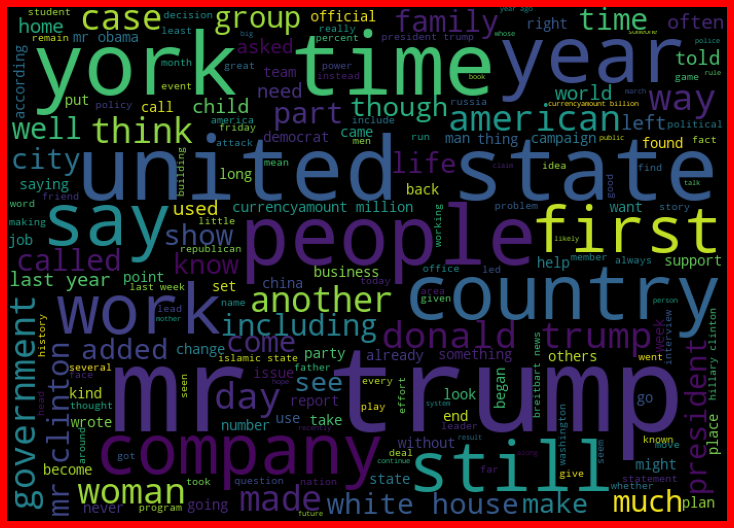

In [ ]:
real = dataset[dataset['label']==0]['lemma_cleaned_combined_text']

real_cloud = WordCloud(width=700,height=500,background_color='black').generate(' '.join(real))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

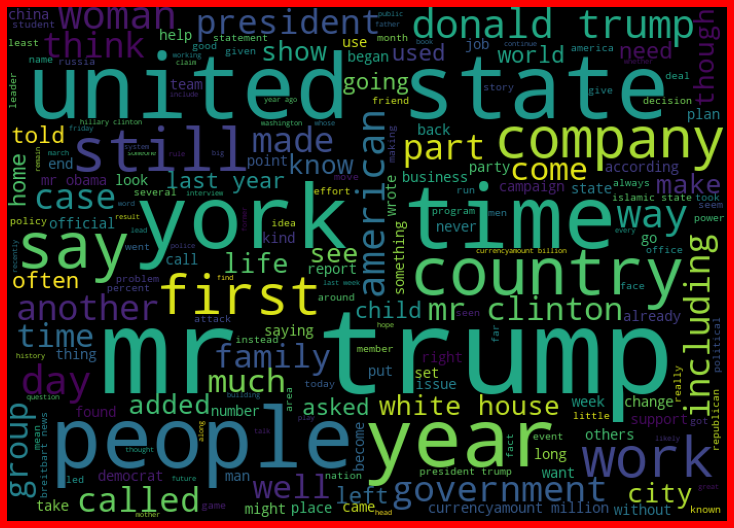

In [ ]:
real = df[df['label']==0]['lemma_cleaned_combined_text']

real_cloud = WordCloud(width=700,height=500,background_color='black').generate(' '.join(real))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(real_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from datetime import datetime

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label',
       'combined_text', 'cleaned_combined_text',
       'lemma_cleaned_combined_text'],
      dtype='object')

In [ ]:
x = df['lemma_cleaned_combined_text']
y = df['label']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y, random_state=42)

In [ ]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", sublinear_tf=False, ngram_range=(1,3))
x_train = vectorizer.fit_transform(x_train)

x_test = vectorizer.transform(x_test)

print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:22.602068


#Using Machine Learning algorithms

In [ ]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.externals import joblib

In [ ]:
models = [SVC(), LogisticRegression(), MultinomialNB(), DecisionTreeClassifier()]

for model in models:
  scores = cross_val_score(model, x_train, y_train, scoring='f1', n_jobs=-1,cv = 5)
  print(model)
  print(f'Model average F1 score: {scores.mean()}')
  print(f'Model F1 score variance: {scores.var()}')
  print('*'*50)
  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Model average F1 score: 0.9652144111655995
Model F1 score variance: 1.0743624486253326e-05
**************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Model average F1 score: 0.9546887573802867
Model F1 score variance: 1.3592145696049719e-05
**************************************************
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Model average F1 score: 0.6119111141998245
Model F1 score variance: 6.49912927960

Observations:
1. DecisionTreeClassifier is giving a better average F1 score and the variance is also low.
2. SVC is also giving a good F1 average score close to DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
models = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier()]

for model in models:
  scores = cross_val_score(model, x_train, y_train, scoring='f1', n_jobs=-1,cv = 5)
  print(model)
  print(f'Model average F1 score: {scores.mean()}')
  print(f'Model F1 score variance: {scores.var()}')
  print('*'*50)
  

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Model average F1 score: 0.9002723108283728
Model F1 score variance: 7.713335170429236e-06
**************************************************
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Model average F1 score: 0.9655890381480241
Model F1 score variance: 1.8015417770140272e-05
**************************************************
GradientBoostingClassifier(ccp_alph

Observations:
1. AdaBoostClassifier and GradientBoostingClassifier are giving pretty close scores.

#Hyper parameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

##Hyperparameter tuning DecisionTreeClassifier

In [ ]:
dt_paramerters = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,5,7,9,10,12],
    'min_samples_leaf' : [1,2,3],
    'max_features' : ['auto','log2',None]
}

dt_model = DecisionTreeClassifier()

dt_randcv = RandomizedSearchCV(dt_model,param_distributions=dt_paramerters, n_iter = 50, cv=5,scoring='f1',n_jobs=-1)
dt_randcv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_randcv

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dt_randcv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'min_samples_leaf': 3}

In [ ]:
print(f'The F1 score for hyperparameter tunned DecisionTreeClassifier is {dt_randcv.best_score_}')

The F1 score for hyperparameter tunned DecisionTreeClassifier is 0.9573971427080934


##Hyperparameter tuning AdaBoostClassifier

In [ ]:
ada_paramerters = {
    'n_estimators' : range(50,200,10),
    'learning_rate' : [0.5,1.0,1.5],
}

ada_model = AdaBoostClassifier()

ada_randcv = RandomizedSearchCV(ada_model,param_distributions=ada_paramerters, n_iter = 10, cv=5,scoring='f1',n_jobs=-1, verbose=10)
ada_randcv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 47.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 87.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 138.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 193.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 236.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 311.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 338.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.5, 1.0, 1.5],
                                        'n_estimators': range(50, 200, 10)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=10)

In [ ]:
ada_randcv.best_params_

{'learning_rate': 0.5, 'n_estimators': 160}

In [ ]:
print(f'The F1 score for hyperparameter tunned AdaBoostClassifier is {ada_randcv.best_score_}')

The F1 score for hyperparameter tunned AdaBoostClassifier is 0.9750792438890835


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [ ]:
dtc_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 12,
                                  max_features = None,
                                  min_samples_leaf = 3)
dtc_model.fit(x_train, y_train)
dtc_y_train_preds = dtc_model.predict(x_train)
dtc_y_test_preds = dtc_model.predict(x_test)
print("DecisionTreeClassifier:")
print("*******************")
print("Train Data Scores:")
print(f"Training Data Accuracy: {accuracy_score(y_train, dtc_y_train_preds)}")
print(f"Training Data F1 Score: {f1_score(y_train, dtc_y_train_preds)}")
print(f"Training Data ROC AUC Score: {roc_auc_score(y_train, dtc_y_train_preds)}")
print(f"Training Data Confusion Matrix: \n{confusion_matrix(y_train, dtc_y_train_preds)}")
print(f"Training Data Classification Report: \n{classification_report(y_train, dtc_y_train_preds)}")
print("*"*50)
print("Test Data Scores:")
print(f"Testing Data Accuracy: {accuracy_score(y_test, dtc_y_test_preds)}")
print(f"Testing Data F1 Score: {f1_score(y_test, dtc_y_test_preds)}")
print(f"Testing Data ROC AUC Score: {roc_auc_score(y_test, dtc_y_test_preds)}")
print(f"Testing Data Confusion Matrix: \n{confusion_matrix(y_test, dtc_y_test_preds)}")
print(f"Testing Data Classification Report: \n{classification_report(y_test, dtc_y_test_preds)}")
print("*"*50)

DecisionTreeClassifier:
*******************
Train Data Scores:
Training Data Accuracy: 0.9754668333463552
Training Data F1 Score: 0.9720789614085008
Training Data ROC AUC Score: 0.9766342221626931
Training Data Confusion Matrix: 
[[7019  233]
 [  81 5466]]
Training Data Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7252
           1       0.96      0.99      0.97      5547

    accuracy                           0.98     12799
   macro avg       0.97      0.98      0.98     12799
weighted avg       0.98      0.98      0.98     12799

**************************************************
Test Data Scores:
Testing Data Accuracy: 0.9679183375865841
Testing Data F1 Score: 0.9635006221484861
Testing Data ROC AUC Score: 0.9690206875610362
Testing Data Confusion Matrix: 
[[2987  122]
 [  54 2323]]
Testing Data Classification Report: 
              precision    recall  f1-score   support

           0       0.98    

In [ ]:
ada_boost_model = AdaBoostClassifier(n_estimators=160, learning_rate=0.5)

ada_boost_model.fit(x_train, y_train)
ada_y_train_preds = ada_boost_model.predict(x_train)
ada_y_test_preds = ada_boost_model.predict(x_test)
print("AdaBoostClassifier:")
print("*******************")
print("Train Data Scores:")
print(f"Training Data Accuracy: {accuracy_score(y_train, ada_y_train_preds)}")
print(f"Training Data F1 Score: {f1_score(y_train, ada_y_train_preds)}")
print(f"Training Data ROC AUC Score: {roc_auc_score(y_train, ada_y_train_preds)}")
print(f"Training Data Confusion Matrix: \n{confusion_matrix(y_train, ada_y_train_preds)}")
print(f"Training Data Classification Report: \n{classification_report(y_train, ada_y_train_preds)}")
print("*"*50)
print("Test Data Scores:")
print(f"Testing Data Accuracy: {accuracy_score(y_test, ada_y_test_preds)}")
print(f"Testing Data F1 Score: {f1_score(y_test, ada_y_test_preds)}")
print(f"Testing Data ROC AUC Score: {roc_auc_score(y_test, ada_y_test_preds)}")
print(f"Testing Data Confusion Matrix: \n{confusion_matrix(y_test, ada_y_test_preds)}")
print(f"Testing Data Classification Report: \n{classification_report(y_test, ada_y_test_preds)}")
print("*"*50)

AdaBoostClassifier:
*******************
Train Data Scores:
Training Data Accuracy: 0.9874208922572076
Training Data F1 Score: 0.9855384891763226
Training Data ROC AUC Score: 0.9876068826080415
Training Data Confusion Matrix: 
[[7152  100]
 [  61 5486]]
Training Data Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7252
           1       0.98      0.99      0.99      5547

    accuracy                           0.99     12799
   macro avg       0.99      0.99      0.99     12799
weighted avg       0.99      0.99      0.99     12799

**************************************************
Test Data Scores:
Testing Data Accuracy: 0.9837768866204886
Testing Data F1 Score: 0.9812985921412061
Testing Data ROC AUC Score: 0.983606633908396
Testing Data Confusion Matrix: 
[[3062   47]
 [  42 2335]]
Testing Data Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.9

Observations:
1. Based on the scores, AdaBoostClassifier is performing better with the data available.

#Final Model

In [ ]:
fake_news_classifier_model = AdaBoostClassifier(n_estimators=160, learning_rate=0.5)

##Cross validating the final model with the entire dataset without missing values

###Vectorizing

In [ ]:
x = df['lemma_cleaned_combined_text']
y = df['label']

In [ ]:
start = datetime.now()
vectorizer = TfidfVectorizer(min_df=0.00009, smooth_idf=True, norm="l2", sublinear_tf=False, ngram_range=(1,3))
x_vec = vectorizer.fit_transform(x)

print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:02:08.336686


###Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val = cross_val_score(fake_news_classifier_model, x_vec, y, scoring='f1', cv = 3, n_jobs=-1, verbose=10)
print(f"The Cross validation F1 scores are:\n{cross_val}")
print(f"The Cross validation F1 score Average is: {cross_val.mean()} ")
print(f"The Cross validation F1 score Variance is: {cross_val.var()} ")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


The Cross validation F1 scores are:
[0.97817423 0.97675298 0.97801991]
The Cross validation F1 score Average is: 0.9776490389813358 
The Cross validation F1 score Variance is: 4.054325102062889e-07 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 68.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 68.0min finished


###Training the Final model with the whole data without missing values

In [ ]:
fake_news_classifier_model.fit(x_vec, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=160, random_state=None)

###Serializing the Final model

In [ ]:
import joblib

In [ ]:
joblib.dump(fake_news_classifier_model, '/content/fake_news_classifier.obj')

['/content/fake_news_classifier.obj']

#Using Deep Learning

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, RNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential

In [ ]:
#defining the cocabulary size
voc_size = 7000

In [ ]:
x = df[['lemma_cleaned_combined_text']]
y = df['label']

In [ ]:
x.shape

(18285, 1)

In [ ]:
y.shape

(18285,)

In [ ]:
news_text = x.copy()

In [ ]:
news_text.reset_index(inplace=True)
news_text.drop(['index'],axis=1,inplace=True)
news_text

,lemma_cleaned_combined_text
0,ethic question dogged agriculture nominee geor...
1,must dig deep stop argentina lionel messi york...
2,cotton house walk plank vote bill pas senate b...
3,paul lepage besieged maine governor sends conf...
4,digital numbr numbr trump win finian cunningha...
...,...
18280,police shift patrolling anxious america york t...
18281,albert pike european migrant crisis rixon stew...
18282,dakota access caught infiltrating protest inci...
18283,stretch summer solstice york time alison cohn ...


In [ ]:
len(news_text['lemma_cleaned_combined_text'][0])

5424

In [ ]:
corpus = []
max_length = 0
for i in news_text['lemma_cleaned_combined_text']:
  if len(i) > max_length:
    max_length = len(i)
  corpus.append(i)

In [ ]:
one_hot_rep = [one_hot(line_item, voc_size) for line_item in corpus]

Padding

In [ ]:
max_length

133697

In [ ]:
sent_length = 1000

padded_docs = pad_sequences(one_hot_rep,maxlen=sent_length,padding='pre')
padded_docs

array([[   0,    0,    0, ..., 3760, 4193, 4812],
       [   0,    0,    0, ..., 2397, 2487, 2397],
       [   0,    0,    0, ..., 6165, 6972, 1289],
       ...,
       [   0,    0,    0, ..., 4216, 6157, 3110],
       [   0,    0,    0, ..., 2487, 4841,  629],
       [   0,    0,    0, ..., 6531, 4131, 6016]], dtype=int32)

In [ ]:
len(padded_docs)

18285

Creating Model

In [ ]:
embedding_vector_features = 500
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(500))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 500)         3500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               2002000   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 5,502,501
Trainable params: 5,502,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
x_final = np.array(padded_docs)
y_final = np.array(y)

In [ ]:
x_final.shape, y.shape

((18285, 1000), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.2, stratify = y_final, random_state = 0)

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=64, epochs=1, verbose=1)

229/229 [==============================] - 6240s 27s/step - loss: 0.4799 - accuracy: 0.7633 - val_loss: 0.5197 - val_accuracy: 0.7689


Serialize the DL model

In [ ]:
import pickle
import joblib

In [ ]:
#pickle.dump(model,open('/content/dl_model.pkl','wb'))
#joblib.dump(model,open('/content/dl_model.obj','wb'))
model.save('/content/sample_data/dl_tf_model.tf')

INFO:tensorflow:Assets written to: /content/sample_data/dl_tf_model.tf/assets


INFO:tensorflow:Assets written to: /content/sample_data/dl_tf_model.tf/assets


In [ ]:
from google.colab import files
!zip -r /content/sample_data/dl_tf_model.zip /content/

#files.download("/content/sample_data/dl_tf_model.tf")

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2021.10.08/ (stored 0%)
  adding: content/.config/logs/2021.10.08/13.45.09.534390.log (deflated 53%)
  adding: content/.config/logs/2021.10.08/13.44.44.548229.log (deflated 86%)
  adding: content/.config/logs/2021.10.08/13.44.08.162145.log (deflated 91%)
  adding: content/.config/logs/2021.10.08/13.45.08.864173.log (deflated 54%)
  adding: content/.config/logs/2021.10.08/13.44.50.952139.log (deflated 53%)
  adding: content/.config/logs/2021.10.08/13.44.27.879250.log (deflated 54%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/